In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

tree = DecisionTreeRegressor()
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)
tree.fit(X, y)
mlp.fit(X, y)

c:\Users\Utilisateur\anaconda3\envs\IOS_ML_Book\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500,
                              random_state=0, tol=0.01))])

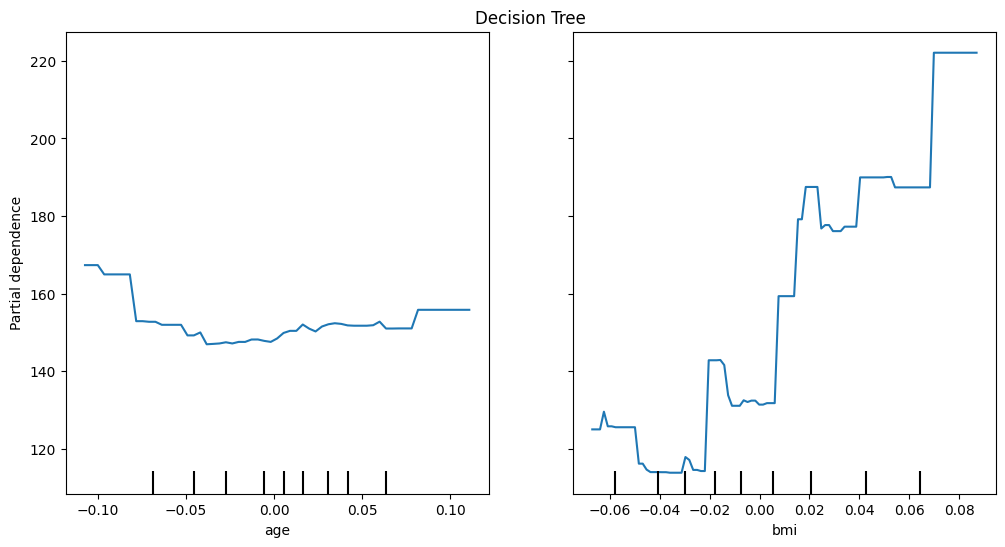

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(tree, X, ["age", "bmi"], ax=ax)

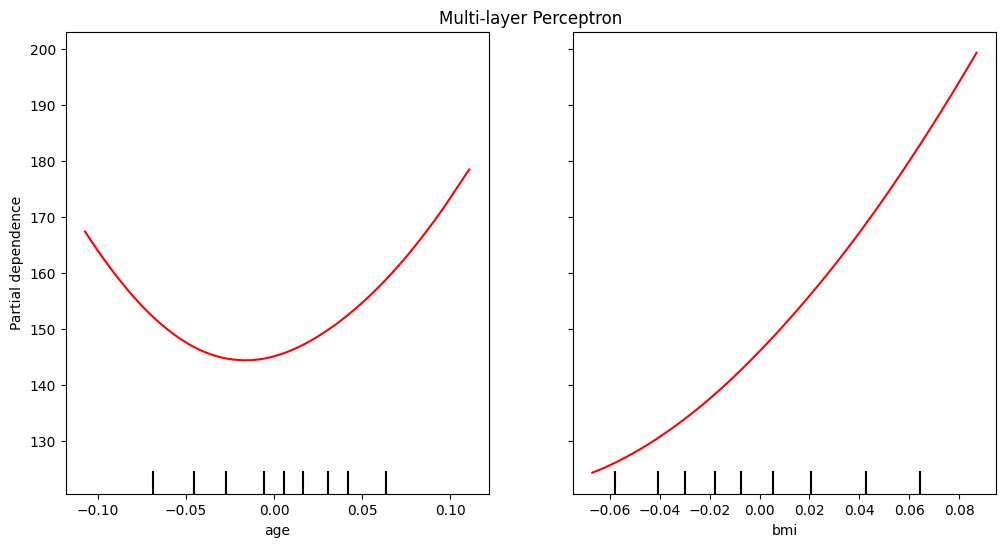

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp, X, ["age", "bmi"], ax=ax, line_kw={"color": "red"}
)

Text(0.5, 1.0, 'Multi-layer Perceptron')

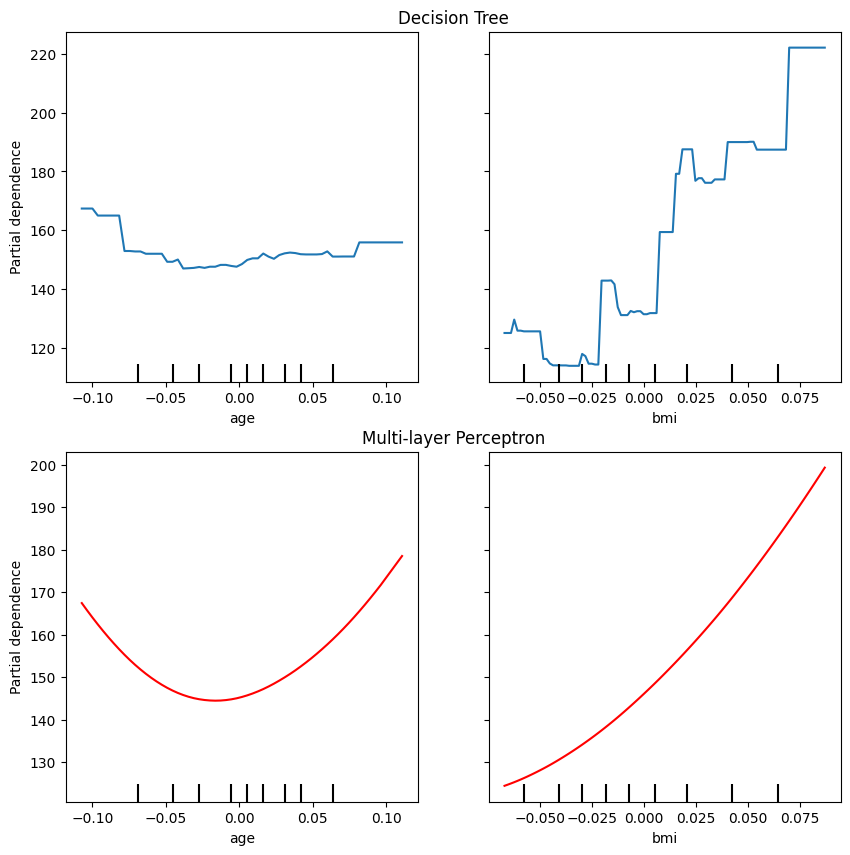

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
tree_disp.plot(ax=ax1)
ax1.set_title("Decision Tree")
mlp_disp.plot(ax=ax2, line_kw={"color": "red"})
ax2.set_title("Multi-layer Perceptron")

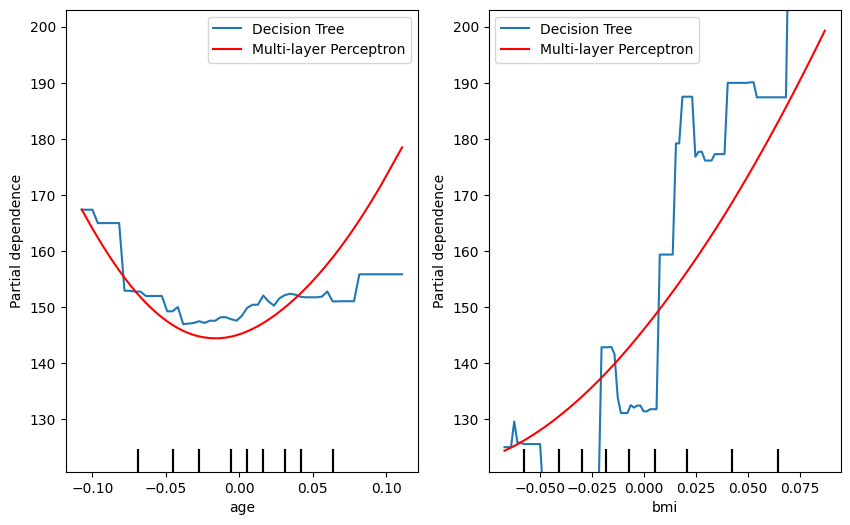

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(
    ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron", "color": "red"}
)
ax1.legend()
ax2.legend()

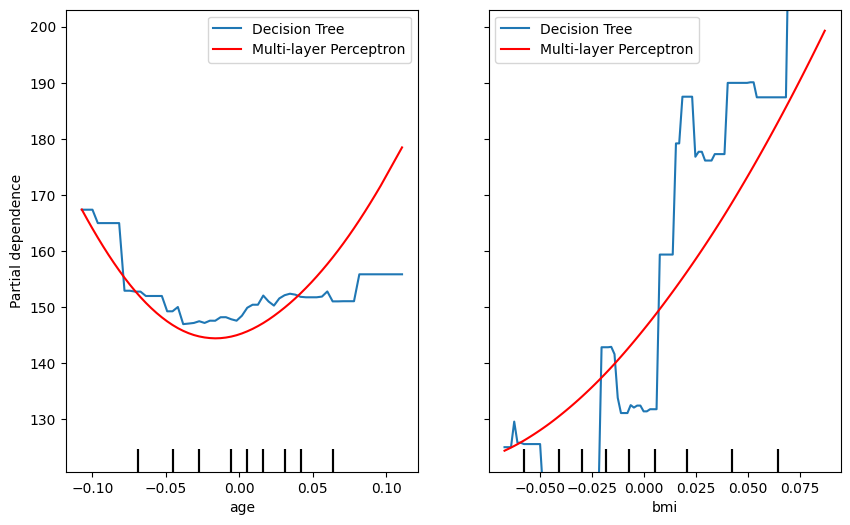

In [7]:
tree_disp.plot(line_kw={"label": "Decision Tree"})
mlp_disp.plot(
    line_kw={"label": "Multi-layer Perceptron", "color": "red"}, ax=tree_disp.axes_
)
tree_disp.figure_.set_size_inches(10, 6)
tree_disp.axes_[0, 0].legend()
tree_disp.axes_[0, 1].legend()
plt.show()

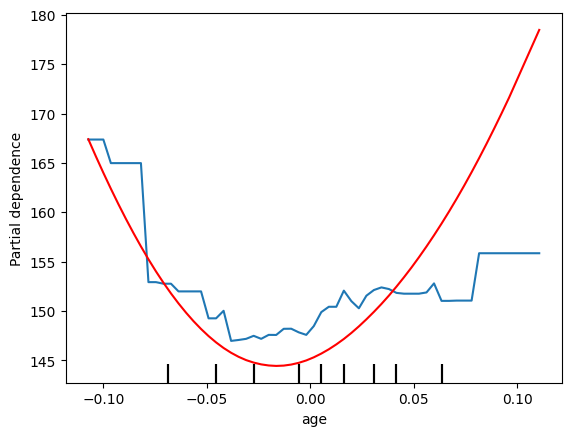

In [8]:
tree_disp = PartialDependenceDisplay.from_estimator(tree, X, ["age"])
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp, X, ["age"], ax=tree_disp.axes_, line_kw={"color": "red"}
)